In [1]:
import numpy as np 
import pandas as pd 
import os
import gc
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
from tqdm.autonotebook import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import keras.backend as K
from keras.models import Sequential
from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model



import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

train_df = pd.read_csv("../input/happy-whale-and-dolphin/train.csv")
#train_df=train_df.drop_duplicates(subset=['individual_id'],keep='last')
train_df.head()

train_df.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  if __name__ == '__main__':


(51033, 3)

In [2]:
def Loading_Images(data, m, dataset):
    X_train = np.zeros((m, 32, 32, 3))
    count = 0
    for fig in tqdm(data['image']):
        img = image.load_img("../input/happy-whale-and-dolphin/"+dataset+"/"+fig, target_size=(32, 32, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)
        X_train[count] = x
        count += 1
    return X_train

def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    y = onehot_encoded
    return y, label_encoder

In [3]:
X = Loading_Images(train_df, train_df.shape[0], "train_images")
X /= 255
y, label_encoder = prepare_labels(train_df['individual_id'])

  0%|          | 0/51033 [00:00<?, ?it/s]

In [4]:
model = Sequential()

model.add(Conv2D(32, (6, 6), strides = (1, 1), input_shape = (32, 32, 3)))
model.add(BatchNormalization(axis = 3))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides = (1,1)))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.85))

model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

2022-03-07 22:41:44.156513: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 32)        3488      
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 27, 27, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 3, 3, 64)          0

2022-03-07 22:41:44.306219: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-07 22:41:44.307456: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-07 22:41:44.311305: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-07 22:41:44.311726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [5]:
history = model.fit(X, y, epochs=150, batch_size=128, verbose=1)
model.save('./last.h5')

2022-03-07 22:41:48.250560: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 627093504 exceeds 10% of free system memory.
2022-03-07 22:41:54.132364: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3181805484 exceeds 10% of free system memory.
2022-03-07 22:41:57.696471: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 627093504 exceeds 10% of free system memory.
2022-03-07 22:41:58.168254: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3181805484 exceeds 10% of free system memory.
2022-03-07 22:42:00.898251: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150


2022-03-07 22:42:02.533857: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


399/399 [==============================] - 13s 15ms/step - loss: 8.8805 - accuracy: 0.0073
Epoch 2/150
399/399 [==============================] - 6s 14ms/step - loss: 8.4277 - accuracy: 0.0096
Epoch 3/150
399/399 [==============================] - 6s 15ms/step - loss: 8.2370 - accuracy: 0.0110
Epoch 4/150
399/399 [==============================] - 6s 14ms/step - loss: 8.1084 - accuracy: 0.0123
Epoch 5/150
399/399 [==============================] - 6s 14ms/step - loss: 7.9998 - accuracy: 0.0127
Epoch 6/150
399/399 [==============================] - 6s 14ms/step - loss: 7.9022 - accuracy: 0.0133
Epoch 7/150
399/399 [==============================] - 6s 15ms/step - loss: 7.8091 - accuracy: 0.0138
Epoch 8/150
399/399 [==============================] - 6s 14ms/step - loss: 7.7271 - accuracy: 0.0142
Epoch 9/150
399/399 [==============================] - 6s 14ms/step - loss: 7.6501 - accuracy: 0.0151
Epoch 10/150
399/399 [==============================] - 6s 14ms/step - loss: 7.5792 - accurac

2022-03-07 22:57:23.558707: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 31922176 exceeds 10% of free system memory.


In [6]:
del X
del y
gc.collect()

986

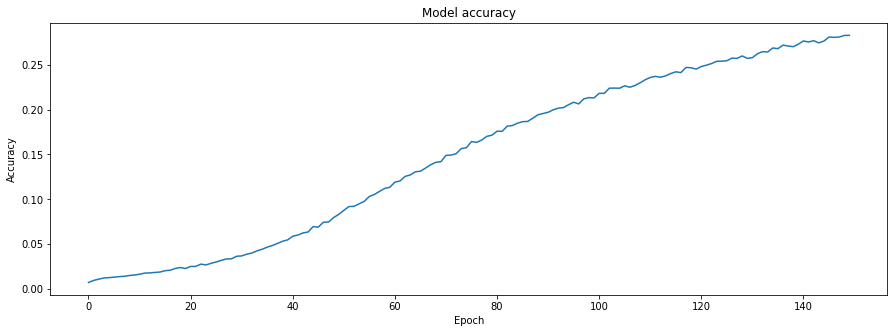

In [7]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

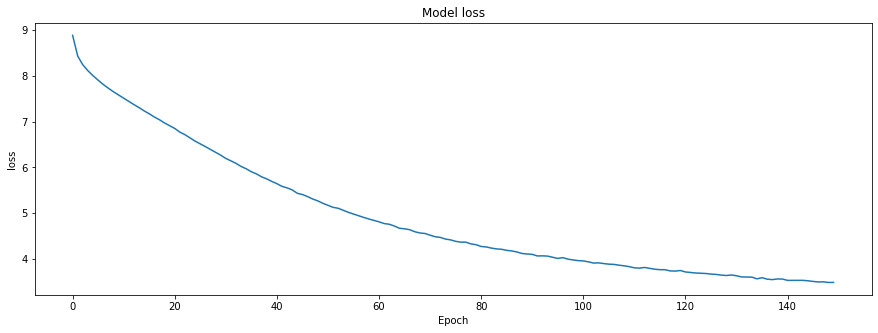

In [8]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

In [9]:
test = os.listdir("../input/happy-whale-and-dolphin/test_images")
print(len(test))

27956


In [10]:
col = ['image']
test_df = pd.DataFrame(test, columns=col)
test_df['predictions'] = ''
#test_df=test_df.head(n=250)

In [11]:
batch_size=5000
batch_start = 0
batch_end = batch_size
L = len(test_df)

while batch_start < L:
    limit = min(batch_end, L)
    test_df_batch = test_df.iloc[batch_start:limit]
    print(type(test_df_batch))
    X = Loading_Images(test_df_batch, test_df_batch.shape[0], "test_images")
    X /= 255
    predictions = model.predict(np.array(X), verbose=1)
    for i, pred in enumerate(predictions):
        p=pred.argsort()[-5:][::-1]
        idx=-1
        s=''
        s1=''
        s2=''
        for x in p:
            idx=idx+1
            if pred[x]>0.6:
                s1 = s1 + ' ' +  label_encoder.inverse_transform(p)[idx]
            else:
                s2 = s2 + ' ' + label_encoder.inverse_transform(p)[idx]
        s= s1 + ' new_individual' + s2
        s = s.strip(' ')
        test_df.loc[ batch_start + i, 'predictions'] = s
    batch_start += batch_size   
    batch_end += batch_size
    del X
    del test_df_batch
    del predictions
    gc.collect()
    

<class 'pandas.core.frame.DataFrame'>


  0%|          | 0/5000 [00:00<?, ?it/s]

157/157 [==============================] - 0s 2ms/step
<class 'pandas.core.frame.DataFrame'>


  0%|          | 0/5000 [00:00<?, ?it/s]

157/157 [==============================] - 0s 3ms/step
<class 'pandas.core.frame.DataFrame'>


  0%|          | 0/5000 [00:00<?, ?it/s]

157/157 [==============================] - 0s 2ms/step
<class 'pandas.core.frame.DataFrame'>


  0%|          | 0/5000 [00:00<?, ?it/s]

157/157 [==============================] - 0s 2ms/step
<class 'pandas.core.frame.DataFrame'>


  0%|          | 0/5000 [00:00<?, ?it/s]

157/157 [==============================] - 0s 2ms/step
<class 'pandas.core.frame.DataFrame'>


  0%|          | 0/2956 [00:00<?, ?it/s]

93/93 [==============================] - 0s 3ms/step
